<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

# Dataframe Manipulation Warmup

In [2]:
import numpy as np
import pandas as pd

np.random.seed(406)

n = 5000
df = pd.DataFrame({
    'favorite_animal': np.random.choice(['cat', 'dog', 'frog', 'lemur', 'panda'], n),
    'favorite_vegetable': np.random.choice(['brussel sprouts', 'potato', 'squash'], n),
    'favorite_fruit': np.random.choice(['banana', 'apple', 'blueberries'], n),
    'wears_glasses': np.random.choice(['yes', 'no'], n),
    'netflix_consumption': np.random.normal(10, 2, n),
    'open_browser_tabs': np.random.randint(2, 90, n),
})

In [3]:
df.head()

,favorite_animal,favorite_vegetable,favorite_fruit,wears_glasses,netflix_consumption,open_browser_tabs
0,lemur,potato,apple,yes,8.313351,44
1,panda,potato,apple,yes,11.801073,10
2,cat,squash,blueberries,yes,10.105141,35
3,lemur,squash,apple,no,11.024605,70
4,dog,brussel sprouts,apple,yes,6.732698,73


- What is the highest amount of netflix consumption? `17.535`

In [6]:
round(df.netflix_consumption.max(),3)

17.535

- How many people wear glasses? What percentage of people is this? `2555`, `.511`

In [10]:
percent = df.wears_glasses.value_counts(normalize=True) * 100
number = df.wears_glasses.value_counts()
glasses_breakdown = pd.DataFrame({'number': number, 'percent': percent})

In [13]:
glasses_breakdown

,number,percent
yes,2555,51.1
no,2445,48.9


- How many people's favorite animal is a dog? `1002`

In [17]:
(df.favorite_animal == 'dog').sum()

1002

- What is the most common favorite animal? `lemur`

In [24]:
df.favorite_animal.value_counts().index[0]

'lemur'

- What is the average netflix consumption for people that prefer brussel
  sprouts? `10.008`

In [28]:
round(df[df.favorite_vegetable == 'brussel sprouts'].netflix_consumption.mean(),3)

10.008

- What is the most common favorite fruit for people who wear glasses and have more than 40 open browser tabs? `blueberries`

In [39]:
df[(df.wears_glasses == 'yes') & (df.open_browser_tabs > 40)].favorite_fruit.value_counts()

blueberries    498
apple          477
banana         472
Name: favorite_fruit, dtype: int64

- What percentage of people have a netflix consumption lower than 7? `.0716`

In [99]:
(df.netflix_consumption < 7).mean()

0.0716

In [43]:
len(df[df.netflix_consumption < 7]) / len(df)

0.0716

- What is the average netflix consumption for people with less than 30 open
  browser tabs? `9.91935`

In [48]:
round(df[df.open_browser_tabs < 30].netflix_consumption.mean(),5)

9.91936

- How many people *don't* wear glasses, have a favorite animal of a panda, have
  a favorite fruit of blueberries, and have more than 60 open browser tabs? 
  
  
- What is the median netflix consumption for this group? 


- What is the most common favorite vegetable for this group? `46`, `10.455`, `potato`

In [52]:
no_glasses = df[df.wears_glasses == 'no']
no_glasses.head(1)

,favorite_animal,favorite_vegetable,favorite_fruit,wears_glasses,netflix_consumption,open_browser_tabs
3,lemur,squash,apple,no,11.024605,70


In [58]:
group = no_glasses[(no_glasses.favorite_animal == 'panda') & (no_glasses.favorite_fruit == 'blueberries') & (no_glasses.open_browser_tabs > 60)]


In [59]:
len(group)

46

In [61]:
round(group.netflix_consumption.median(),3)

10.455

In [63]:
group.favorite_vegetable.value_counts().index[0]

'potato'

**<font color=purple>Another way using a combo mask...</font>**

In [101]:
glasses_no = df.wears_glasses == 'no'
pandas_yes = df.favorite_animal == 'panda'
tabs = df.open_browser_tabs > 60
likes_blueberries = df.favorite_fruit == 'blueberries'

In [102]:
mask = glasses_no & pandas_yes & tabs & likes_blueberries

In [105]:
df[mask].shape[0]

46

In [108]:
round(df[mask].netflix_consumption.median(),3)

10.455

In [109]:
df[mask].favorite_vegetable.value_counts()

potato             19
brussel sprouts    14
squash             13
Name: favorite_vegetable, dtype: int64

**<font color=purple>Solve using .query and method chaining</font>**

In [112]:
(df.query('wears_glasses == "no"')
 .query('favorite_animal == "panda"')
 .query('open_browser_tabs > 60')
 .query('favorite_fruit == "blueberries"')
 .netflix_consumption.median()
)

10.45479760071613

- What is the least popular combination of favorite fruit and vegetable? `apple` and `potato`

In [82]:
#from itertools import product

df.groupby(['favorite_fruit', 'favorite_vegetable']).size().sort_values()

favorite_fruit  favorite_vegetable
apple           potato                512
banana          squash                524
apple           squash                555
blueberries     brussel sprouts       555
                potato                560
apple           brussel sprouts       565
banana          potato                570
                brussel sprouts       576
blueberries     squash                583
dtype: int64

In [116]:
df.groupby(['favorite_fruit', 'favorite_vegetable']).size().idxmin()

('apple', 'potato')

In [115]:
pd.crosstab(df.favorite_fruit, df.favorite_vegetable)

favorite_vegetable,brussel sprouts,potato,squash
favorite_fruit,,,
apple,565,512,555
banana,576,570,524
blueberries,555,560,583


- Which combination of favorite animal and wearing glasses has the highest average
  netflix consumption? people that wear glasses and prefer pandas

In [123]:
# values, rows, columns, aggfunc=np.max/aggfunc=np.max

df.pivot_table('netflix_consumption', 'favorite_animal', 'wears_glasses')

wears_glasses,no,yes
favorite_animal,,
cat,9.846183,9.884685
dog,9.933246,10.087352
frog,9.962311,9.834740
lemur,10.024557,10.010196
panda,9.946293,10.092273


In [119]:
df.groupby(['favorite_animal', 'wears_glasses']).netflix_consumption.mean().sort_values(ascending=False)

favorite_animal  wears_glasses
panda            yes              10.092273
dog              yes              10.087352
lemur            no               10.024557
                 yes              10.010196
frog             no                9.962311
panda            no                9.946293
dog              no                9.933246
cat              yes               9.884685
                 no                9.846183
frog             yes               9.834740
Name: netflix_consumption, dtype: float64

- **Bonus**: for each of the above questions, what kind of visualization would
  be the most effective in conveying your answer?

In [98]:
temp1 = df.groupby(['favorite_animal', 'wears_glasses', 'netflix_consumption']).size()
temp1.head(1)

favorite_animal  wears_glasses  netflix_consumption
cat              no             4.194155               1
dtype: int64

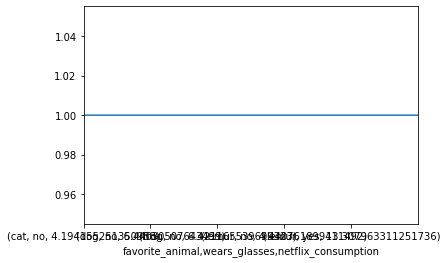

In [92]:
temp1.plot()